In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from plotter import Plotter
%matplotlib inline

Set the directory of the records and the save path of the plot. For example, if one want to plot the result of BIBD model and BIBD&GC model, one needs to modify the codes of the $\#\#$ blocks.

`records = 20
epoches = 75
path = './figures/ResNet_BIBD_BIBD&GC.png'
models = ['BIBD', "BIBD_GC"]
`

The names in the `models` should be consistent with the result folder name.

In [2]:
############################################################################
## set the number of records
records = 20

## set the number of epoches in each records
epoches = 75
                                                                   
## set the save path of the figures                         
path = './figures/ResNet_EE_models.png'                                   
## set the dir name of the records                                           
models = ['EE','EE_BIBD', 'GC_EE', 'BIBD_EE_GC']                                      
labels = ['EE_0', 'EE_1', 'EE_2', 'EE_BIBD_0', 'EE_BIBD_1', 'EE_BIBD_2', 
          'GC_EE_0', 'GC_EE_1', 'GC_EE_2', 'BIBD_EE_GC_0', 'BIBD_EE_GC_1', 'BIBD_EE_GC_2'] 
                                                                       
############################################################################

train_acc_files = ['./results/'+name+'/train_acc_' for name in models]
train_loss_files = ['./results/'+name+'/train_loss_' for name in models]
test_acc_files = ['./results/'+name+'/test_acc_' for name in models]
test_loss_files = ['./results/'+name+'/test_loss_' for name in models]
labels = np.array(labels)

train_acc = None
train_loss = None
test_acc = None
test_loss = None

for n in range(len(models)):
    train_acc_temp = 0
    train_loss_temp = 0
    test_acc_temp = 0
    test_loss_temp = 0
    for i in range(20): # accumulate models[n]'s 20 results
        train_acc_temp += genfromtxt(train_acc_files[n] + str(i + 1) + '.csv', delimiter = ',').reshape(epoches,-1)
        train_loss_temp += genfromtxt(train_loss_files[n] + str(i + 1) + '.csv', delimiter = ',').reshape(epoches,-1)
        test_acc_temp += genfromtxt(test_acc_files[n] + str(i + 1) + '.csv', delimiter = ',').reshape(epoches,-1)
        test_loss_temp += genfromtxt(test_loss_files[n] + str(i + 1) + '.csv', delimiter = ',').reshape(epoches,-1)
    # taking average
    if type(train_acc) != type(train_acc_temp):
        train_acc = train_acc_temp / records
        train_loss = train_loss_temp / records
        test_acc = test_acc_temp / records
        test_loss = test_loss_temp / records
    else:
        train_acc = np.append(train_acc, (train_acc_temp / records).reshape(epoches,-1), 1)
        train_loss = np.append(train_loss, (train_loss_temp / records).reshape(epoches,-1), 1)
        test_acc = np.append(test_acc, (test_acc_temp / records).reshape(epoches,-1), 1)
        test_loss = np.append(test_loss, (test_loss_temp / records).reshape(epoches,-1), 1)

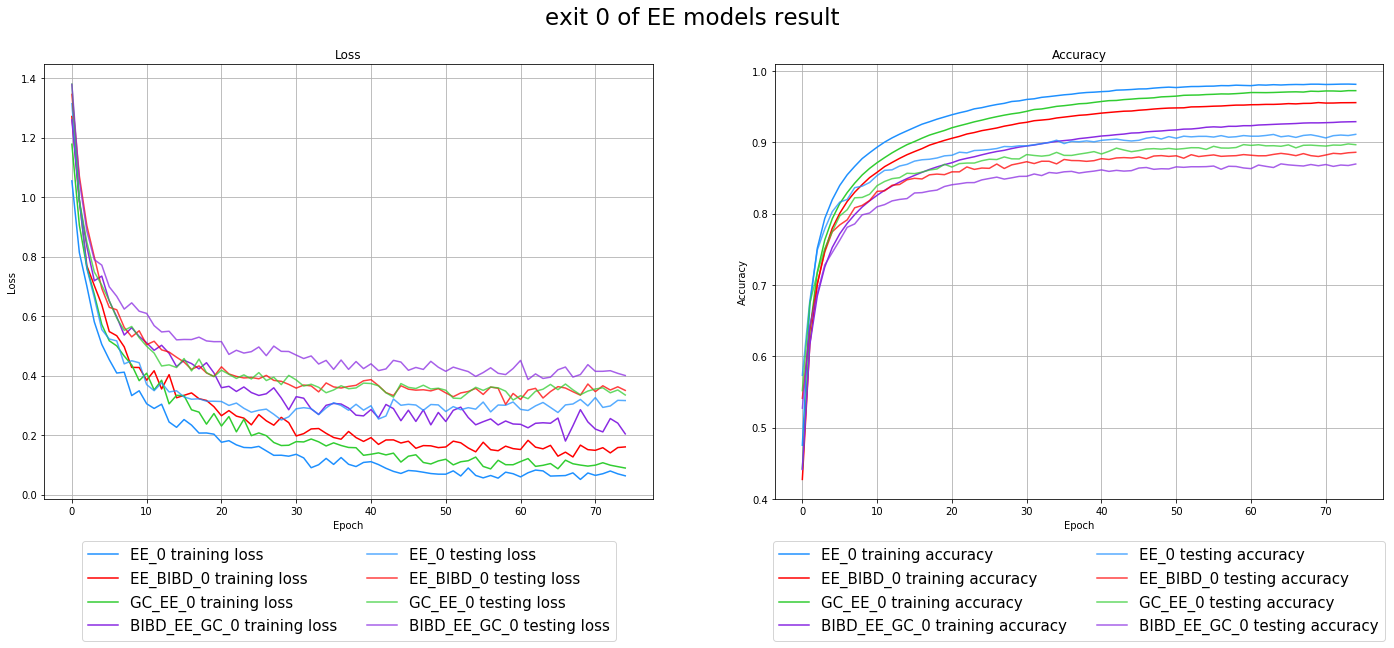

In [3]:
############################################################################

plotter = Plotter(title="exit 0 of EE models result",
                         save_to_filepath='./figures/EE_models_0.png')                           
plotter.plot_values(np.take(labels,[0,3,6,9]), train_loss[:,[0,3,6,9]], test_loss[:,[0,3,6,9]], 
                    train_acc[:,[0,3,6,9]], test_acc[:,[0,3,6,9]])  

############################################################################

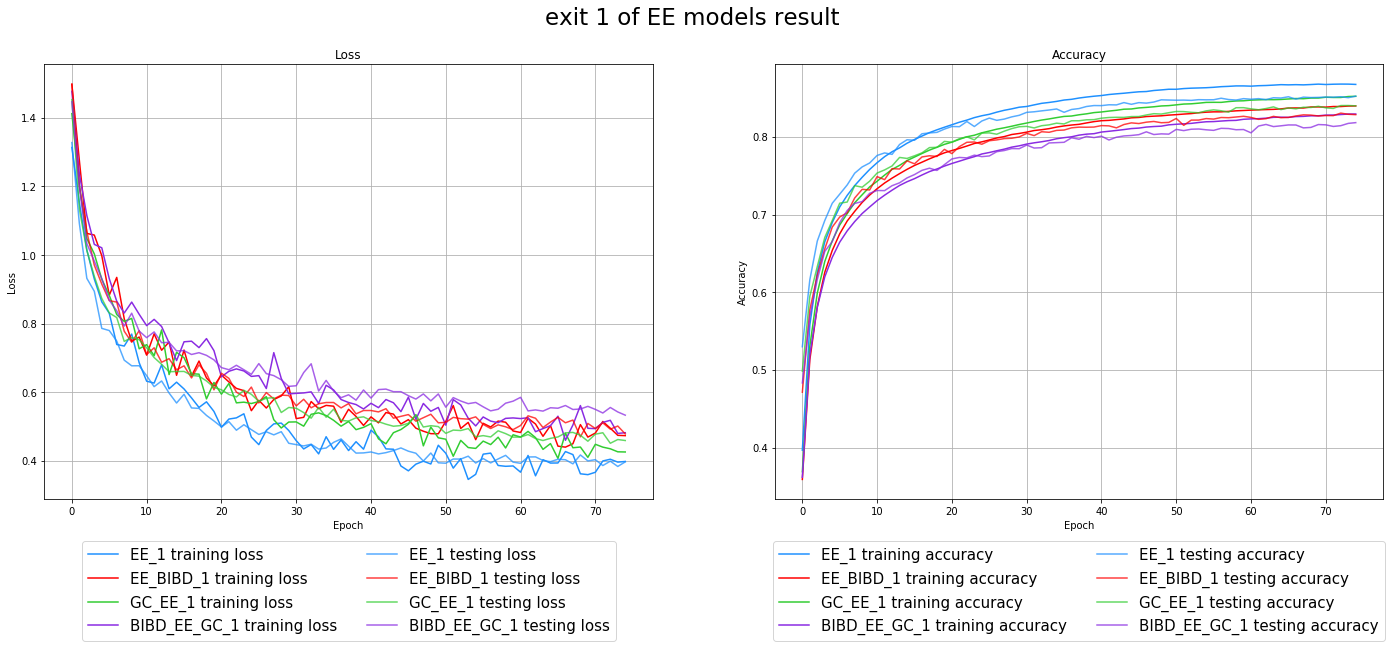

In [4]:
############################################################################

plotter = Plotter(title="exit 1 of EE models result",
                         save_to_filepath='./figures/EE_models_1.png')                           
plotter.plot_values(np.take(labels,[1,4,7,10]), train_loss[:,[1,4,7,10]], test_loss[:,[1,4,7,10]], 
                    train_acc[:,[1,4,7,10]], test_acc[:,[1,4,7,10]])  

############################################################################

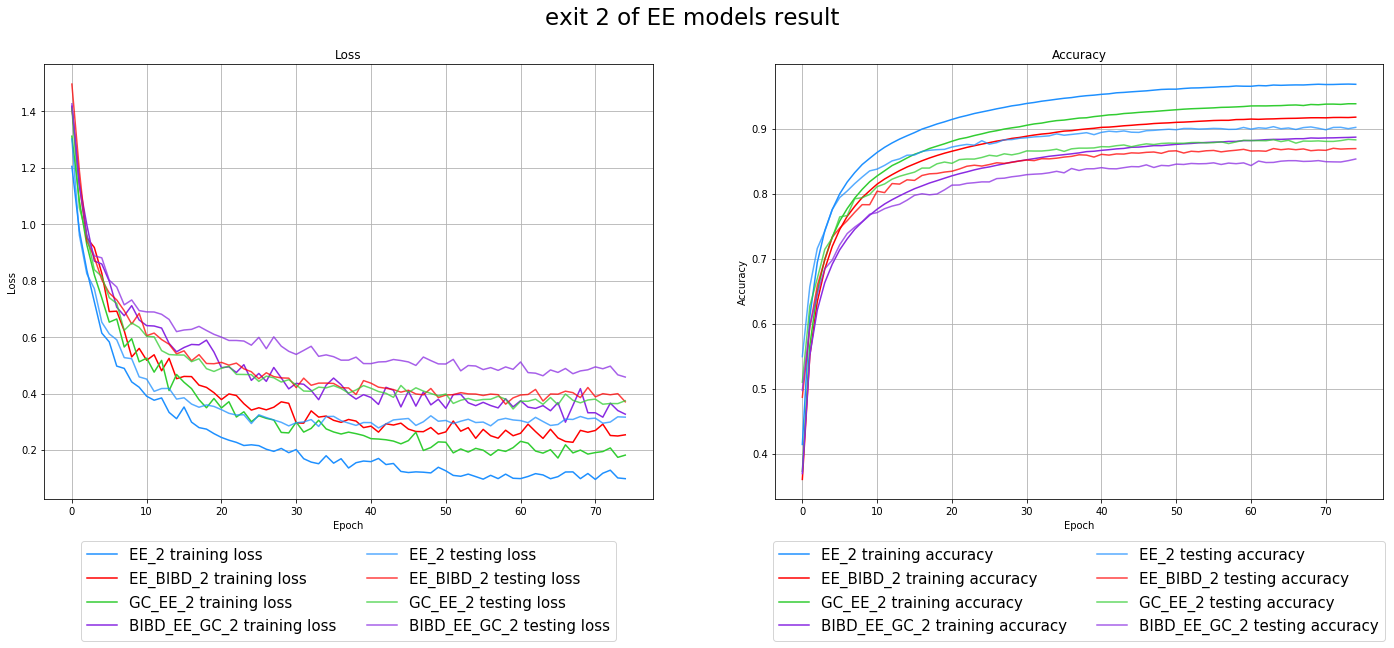

In [5]:
############################################################################

plotter = Plotter(title="exit 2 of EE models result",
                         save_to_filepath='./figures/EE_models_2.png')                           
plotter.plot_values(np.take(labels,[2,5,8,11]), train_loss[:,[2,5,8,11]], test_loss[:,[2,5,8,11]], 
                    train_acc[:,[2,5,8,11]], test_acc[:,[2,5,8,11]])  

############################################################################